In [ ]:
def caltime(h,w,v0):
    a = 9.8*h/((h**2+w**2)**0.5)
    if(a==0): 
        t= w/v0
        v1 = v0
    else:
        t = (-v0+(v0**2+2*9.8*h)**0.5)/(9.8*h/((h**2+w**2)**0.5))
        v1 = v0+t*(9.8*h/((h**2+w**2)**0.5))
    return v1,t

In [ ]:
import random  # 随机函数包
import matplotlib.pyplot as plt  # 绘图模块调用
# from scipy.interpolate import spline
from scipy.interpolate import make_interp_spline

def curve(PoleNum):
    CurveNum=10 #生成多少条曲线
    #PoleNum=9  #使用多少根柱子来确定曲线形状
    height=1000.0   #坡的高度为1000m
    width=800.0     #坡的宽度为800m
    PoleSize=2000 # 相邻柱子之间考虑2000个点
    wsize=PoleSize*(PoleNum+1)  #拟合曲线一共考虑2000*（9+1）=20000个点
    wgrid=width/wsize    #x轴（坡的宽度方向）的格点分辨率
    x_smooth=[0]*(wsize+1)   #定义20000+1个点，记录x值
    for i in range(wsize+1):
        x_smooth[i]=i*wgrid

    Pgrid=width/(PoleNum+1)   #每根柱子的格点分辨率
    x=[0]*(PoleNum+2)    #定义9+2个点，记录起点、9根柱子、终点的x值（坡的宽度方向）
    for i in range(PoleNum+2):
        x[i]=Pgrid*i
    y=[0]*(PoleNum+2)    #定义9+2个点，记录起点、9根柱子、终点的y值（坡的高度方向）
    y[0]=height #确定纵轴起点
    #coe = random.uniform(0, 0.5)
    coe = 0.01
    y[PoleNum+1]=int(height*coe) #纵轴终点，最好是略高于0点

    goodcurvenum=0
    while goodcurvenum<1 :
        tmp = []
        for j in range(PoleNum):
            tmp.append(random.randint(0,height))
        tmp.sort(reverse=True)
        for j in range(PoleNum):
            y[j + 1] = tmp[j]  # 生成每个柱子的随机高度
        y_smooth = make_interp_spline(x, y)(x_smooth)  #进行曲线拟合
        OutHeight = False
        for j in range(1, wsize):
            if (y_smooth[j] >=height): OutHeight=True  #曲线不能超出起点高度
        if(not OutHeight): goodcurvenum=1  #曲线没有超出起点高度，

    time = 0
    for i in range(1,len(x_smooth)):
        w = x_smooth[i]-x_smooth[i-1]
        h = y_smooth[i-1] - y_smooth[i]
        if i == 1:
            v = 0
        v = caltime(h,w,v)[0]
        time += caltime(h,w,v)[1]
        
    dist = 0
    for i in range(1,len(x_smooth)):
        split = ((x_smooth[i]-x_smooth[i-1])**2+(y_smooth[i-1] - y_smooth[i])**2)**0.5
        dist = dist + split
    dist = round(dist,2)
    v = round(v,2)
    time = round(time,2)
    return([y,dist,time])

In [ ]:
f = open("time_and_dist_pole_9.txt","w")
f.write("Num, Start, Pole1, Pole2, Pole3, Pole4, Pole5, Pole6, Pole7, Pole8, Pole9, End, CurveLength(m), Time(s)\n")
f.close()
for i in range(100000):
    if(i % 500 == 0):
        print(i)
    result = curve(9)
    f = open("time_and_dist_pole_9.txt","a")
    f.write("%d" % (i+1))
    for j in range(len(result[0])):
        f.write(", %d" % result[0][j])
    f.write(", %f" % result[1])
    f.write(", %f\n" % result[2])
    f.close()

In [ ]:
"""从文本里读取的数据，输出为csv格式，数据准备好之后本段可注释掉"""
Readtxt=True
if(Readtxt):
    f = open('./随机高度与下降时间_9.csv', 'w')  #构建新的csv文件，便于后续读取
    f.close()
    f = open('./time_and_dist_pole_9.txt')
    lines = f.readlines()
    for i in range(0,len(lines)):
        output = lines[i].split(',')
        if i == 0:
            #output = pd.DataFrame(np.array(output).reshape(1, 14))  
            output = pd.DataFrame(np.array(output).reshape(1, 8))  
            output.to_csv('随机高度与下降时间_9.csv', mode='a', header=False)
        else:
            if float(output[-1]) < 30:  #其中时间超过30s的数据暂时不考虑
                output = pd.DataFrame(np.array(output).reshape(1, 8))  
                #利用np(numpy)的array函数把一行字符串变为一行数组，pd(pandas)的DataFrame函数把np数组分成14列
                output.to_csv('随机高度与下降时间_9.csv', mode='a', header=False)  
                #循环读取所有数据，形成100000*14的二维数据表格


数据读取完毕
Epoch 1/500


C:\Users\Tong Jiawei\anaconda3\envs\ml37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


123/123 [==============================] - 1s 2ms/step - loss: 92.2258 - mae: 5.0497 - val_loss: 6.4043 - val_mae: 1.8364 - lr: 0.0010
Epoch 2/500
123/123 [==============================] - 0s 1ms/step - loss: 4.5028 - mae: 1.6231 - val_loss: 7.3793 - val_mae: 2.3409 - lr: 0.0010
Epoch 3/500
123/123 [==============================] - 0s 2ms/step - loss: 4.3252 - mae: 1.5828 - val_loss: 4.3621 - val_mae: 1.4525 - lr: 0.0010
Epoch 4/500
123/123 [==============================] - 0s 2ms/step - loss: 3.8806 - mae: 1.4912 - val_loss: 6.4157 - val_mae: 2.2094 - lr: 0.0010
Epoch 5/500
123/123 [==============================] - 0s 1ms/step - loss: 4.0421 - mae: 1.5170 - val_loss: 3.7090 - val_mae: 1.3965 - lr: 0.0010
Epoch 6/500
123/123 [==============================] - 0s 1ms/step - loss: 3.5934 - mae: 1.4198 - val_loss: 3.7057 - val_mae: 1.5621 - lr: 0.0010
Epoch 7/500
123/123 [==============================] - 0s 1ms/step - loss: 3.5912 - mae: 1.4211 - val_loss: 3.4008 - val_mae: 1.4266 - 

123/123 [==============================] - 0s 2ms/step - loss: 2.7750 - mae: 1.2184 - val_loss: 3.1740 - val_mae: 1.2053 - lr: 1.0000e-04
Epoch 57/500
123/123 [==============================] - 0s 2ms/step - loss: 2.7393 - mae: 1.2074 - val_loss: 3.4490 - val_mae: 1.1948 - lr: 1.0000e-04
Epoch 58/500
123/123 [==============================] - 0s 1ms/step - loss: 2.7651 - mae: 1.2141 - val_loss: 3.0037 - val_mae: 1.2551 - lr: 1.0000e-04
Epoch 59/500
123/123 [==============================] - 0s 1ms/step - loss: 2.8026 - mae: 1.2254 - val_loss: 3.1958 - val_mae: 1.1872 - lr: 1.0000e-04
Epoch 60/500
123/123 [==============================] - 0s 2ms/step - loss: 2.7860 - mae: 1.2202 - val_loss: 3.1319 - val_mae: 1.2034 - lr: 1.0000e-04
Epoch 61/500
123/123 [==============================] - 0s 1ms/step - loss: 2.8025 - mae: 1.2231 - val_loss: 3.0136 - val_mae: 1.2420 - lr: 1.0000e-04
Epoch 62/500
123/123 [==============================] - 0s 1ms/step - loss: 2.8844 - mae: 1.2437 - val_loss

123/123 [==============================] - 0s 1ms/step - loss: 2.6537 - mae: 1.1882 - val_loss: 2.9556 - val_mae: 1.2794 - lr: 1.0000e-05
Epoch 111/500
123/123 [==============================] - 0s 1ms/step - loss: 2.6466 - mae: 1.1877 - val_loss: 3.0468 - val_mae: 1.2071 - lr: 1.0000e-05
Epoch 112/500
123/123 [==============================] - 0s 1ms/step - loss: 2.6573 - mae: 1.1892 - val_loss: 3.0650 - val_mae: 1.2001 - lr: 1.0000e-05
Epoch 113/500
123/123 [==============================] - 0s 1ms/step - loss: 2.6503 - mae: 1.1861 - val_loss: 2.9627 - val_mae: 1.2446 - lr: 1.0000e-05
Epoch 114/500
123/123 [==============================] - 0s 1ms/step - loss: 2.6550 - mae: 1.1878 - val_loss: 2.9544 - val_mae: 1.2805 - lr: 1.0000e-05
Epoch 115/500
123/123 [==============================] - 0s 1ms/step - loss: 2.6646 - mae: 1.1928 - val_loss: 2.9521 - val_mae: 1.2791 - lr: 1.0000e-05
Epoch 116/500
123/123 [==============================] - 0s 1ms/step - loss: 2.6405 - mae: 1.1852 - va

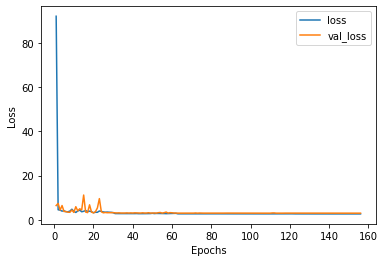

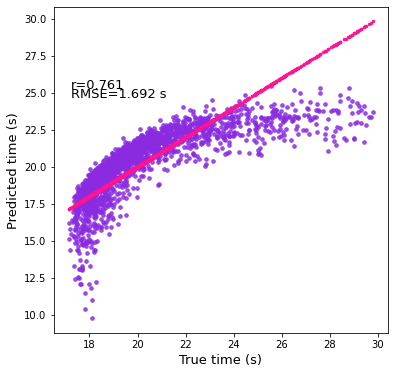

In [1]:
import numpy as np  #数组处理模块，定义为np
import pandas as pd #data.frame数据分析处理模块，定义为pd
import os #目录操作，简化操作
 #以下导入sklearn机器学习工具包
from sklearn.model_selection import train_test_split #数据训练集与测试集划分
#from sklearn.preprocessing import StandardScaler #数据标准化（类似于将不同描述符的数值调整到同一区间）
#在本工作中9根柱子的参数范围接近，不需要数据标准化
from sklearn.metrics import mean_squared_error #求解误差
import tensorflow as tf #构建神经网络框架，tensorflow是google开发的神经网络，定义为tf
import keras #构建神经网络框架，类似于tensorflow的封装模块
from keras import layers  #构建神经网络的层级结构，定义为layers
from keras import regularizers  #网络参数的正则化
import matplotlib.pyplot as plt  #绘图模块



                

"""读取数据，划分训练集和测试集"""
data = pd.read_csv('随机高度与下降时间_9.csv')  
#利用pd的读取csv的函数，获得数据，存储在data这个dataframe里面，类似于excel表格
data_X = data.iloc[:, 3:11].values  # 把csv的第4-12列存储的9根柱子高度数据读出来，作为训练描述符
data_y1 = data.iloc[:, 14].values   # 把csv的第15列存储的下降时间数据读出来，作为训练目标
print("数据读取完毕")

train_feature, test_feature = train_test_split(data_X, test_size=0.2, random_state=42)  
train_target1, test_target1 = train_test_split(data_y1, test_size=0.2, random_state=42)
#将描述符与目标数据进行测试-训练集的划分，test_size=0.2代表80%训练和20%测试，random_state=42代表随机划分的策略
#将dataframe分别存储在train_feature, test_feature，train_target1, test_target1 

'''
#数据标准化，在本工作中，由于9根柱子的参数范围都很接近，不需要进行数据标准化
scaler = StandardScaler()  #定义标准化参数
train_feature = scaler.fit_transform(train_feature) #将训练集的描述符dataframe给标准化
test_feature = scaler.fit_transform(test_feature) #将测试集的描述符dataframe给标准化
print(train_feature.shape,test_target1.shape)  #输出划分的数据框架访问：(80000, 9) (20000,)
'''

"""构建NN模型"""
def build_model():   #定义子函数，方便调用
    model = keras.models.Sequential()   #描述神经网络的框架结构：各层网络
    model.add(keras.Input(shape=(train_feature.shape[1],)))  #利用训练集的描述符的数据（此处为9），构建输入层
    model.add(layers.Dense(64
                           , activation='relu'
                           , kernel_regularizer=regularizers.l2(0.001)
                           ))   
    #隐藏层1，64个神经元，采用激活函数“relu”（非线性拟合）的l2正则模型，惩罚参数设为0.001（根据预测效果可调）
    model.add(layers.Dense(64
                           , activation='relu'
                           , kernel_regularizer=regularizers.l2(0.001)
                           ))
    #隐藏层2，64个神经元，采用激活函数“relu”（非线性拟合）的l2正则模型，惩罚参数设为0.001（根据预测效果可调）
    model.add(layers.Dense(128
                           , activation='relu'
                           , kernel_regularizer=regularizers.l2(0.001)
                           ))
    #隐藏层3，128个神经元，采用激活函数“relu”（非线性拟合）的l2正则模型，惩罚参数设为0.001（根据预测效果可调）
    model.add(layers.Dense(64
                           , activation='relu'
                           , kernel_regularizer=regularizers.l2(0.001)
                           ))
    #隐藏层4，64个神经元，采用激活函数“relu”（非线性拟合）的l2正则模型，惩罚参数设为0.001（根据预测效果可调）
    #神经元数目（通常为32的整数倍）和隐藏层的层数，都可以根据实际预测效果调节

    model.add(layers.Dense(1))  #定义输出层，只有一个1神经元，对应1个输出结果

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=1e-3),
        loss="mse",
        metrics=["mae"]
    )
    #定义损失函数，采用Adam优化器来优化，学习率设置为lr=1e-3（最小化损失函数）
    #loss='mse',metrics=["mae"] 代表模型评估指标，可以根据实际预测效果调节
    return model   #返回神经网络框架

"""训练NN"""
model = build_model()  #调用子函数，建立神经网络框架

# 设置tensflow神经网络的回调函数参数，在训练过程中帮助模型收敛并且把最好的模型保存下来
# ModelCheckpoint 训练过程中保存模型权重（最佳性能模型权重）
# ReduceLROnPlateau 训练过程出现验证损失平台时，减小学习率跳出平台
# EarlyStopping 早停，监控的指标在设定的轮次数内不再改善，早停来中断训练
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="time.h5", #收敛好的最佳模型存储在time.h5文件里面，“.h5”是比较通用的文件格式
        monitor="val_loss",
        save_best_only=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor = 0.1,
        patience=10
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=30
    )
]

#以下开始训练集的特征与目标的拟合fit
history = model.fit(
    train_feature, train_target1,   #拟合训练集
    validation_data=(test_feature, test_target1),  #测试集作为验证
    epochs=500, batch_size=64,  
    #epochs=500：训练最大轮数，几千次基本上就足够了
    #batch_size=64：进行梯度下降训练时，每批次包含64组数据（从80000组训练集数据中随机抽取）
    callbacks=callbacks_list,  #调用上述定义的回调函数参数
    verbose=1 #训练过程中，输出信息格式的选项
)


"""训练过程中指标变化""" 
#定义子函数，画图展示损失函数的优化过程
def plot_array(array, label=None):
    x = np.arange(len(array))
    x += 1
    plt.plot(x, array, label=label)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


plot_array(history.history['loss'], label="loss")  #训练集的损失函数
plot_array(history.history['val_loss'], label="val_loss")  #验证集（也就是测试集）的损失函数
#从最终结果可以看到，基本上epochs到达100多轮，两个损失函数都已经收敛在零值，达到预期效果，可以跳出训练

"""训练结束后，就可以调用model.predict能力，利用描述符来预测结果"""
pred_test_target = model.predict(test_feature).flatten() 
#利用测试集描述符来预测
r_test = format(np.corrcoef(test_target1, pred_test_target)[0][1], '.3f')
#调用np的corrcoef模块，来计算测试集的预测值和真实值的pearson相关性系数，.3f表示保留3位小数
rmse_test = format(np.sqrt(mean_squared_error(test_target1, pred_test_target)), '.3f')
#调用mean_squared_error模块，来计算测试集的RMSE绝对误差，.3f表示保留3位小数
print( "r_test = " + r_test, "\nrmse_test = " + rmse_test)


#定义子函数，画图展示预测值与真实值的吻合情况
def plot_scatter(x, y, label=None):
    plt.figure(figsize=(6,6))
    plt.scatter(x, y, label=label,c='#8A2BE2',marker='o',alpha=0.8,s=13,zorder=0)
    plt.scatter(x, x, c='#FF1493', marker='o', s=6, zorder=2)
    plt.xlabel("True time (s)",fontsize=13)
    plt.ylabel("Predicted time (s)",fontsize=13)
    plt.text(np.min(x)+0.1,np.max(y)-0.2,"r=" + r_test,fontsize=13)
    plt.text(np.min(x)+0.1,np.max(y)-0.8,"RMSE=" + rmse_test+' s',fontsize=13)
    # plt.show()
    plt.savefig('timeNN.png', dpi=300, format='png')  # 保存图片

plot_scatter(test_target1, pred_test_target, label='testset') #展示测试集的预测效果
      
print("程序结束")

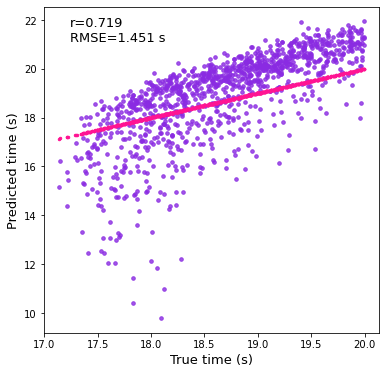

In [2]:
test_target_low=[]
pred_test_target_low=[]
for i in range(len(test_target1)):
    if(test_target1[i]<20):
        test_target_low.append(test_target1[i])
        pred_test_target_low.append(pred_test_target[i])
r_test = format(np.corrcoef(test_target_low, pred_test_target_low)[0][1], '.3f')
rmse_test = format(np.sqrt(mean_squared_error(test_target_low, pred_test_target_low)), '.3f')
plot_scatter(test_target_low, pred_test_target_low, label='testset') #展示测试集的预测效果